In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv')
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,https://www.airbnb.com/rooms/36121,20250301213336,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,https://www.airbnb.com/rooms/36647,20250301213336,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,https://www.airbnb.com/rooms/38663,20250301213336,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,https://www.airbnb.com/rooms/38833,20250301213336,2025-03-03,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,https://a0.muscache.com/pictures/7554f9e5-4ab0...,166532,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,https://www.airbnb.com/rooms/39282,20250301213336,2025-03-02,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,https://a0.muscache.com/pictures/ef8f43ad-d967...,168525,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54


Can not list all the columns at the same time.

# host related columns:

host_id,
host_name,
host_since,
host_location,
host_about,
host_response_time,
host_response_rate,
host_acceptance_rate,
host_is_superhost,
host_thumbnail_url,
host_picture_url,
host_neighbourhood,
host_listings_count,
host_total_listings_count,
host_verifications,
host_has_profile_pic,
host_identity_verified,
host_url.


# Property and room features:
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities

# Location based columns:
latitude
longitude
zipcode
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
country
country_code
market
smart_location


# Price and cost fields:

price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped


# Review metrics:

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month


# Metadata and URLs:

id
name
listing_url
description
summary
space
neighborhood_overview
picture_url
calendar_updated
scrape_id
last_scraped
source
license


# Experience and Misc:

experiences_offered
is_location_exact
requires_license
instant_bookable
is_business_travel_ready


# IDK drop or modify:  
'estimated_occupancy_l365d', 




# Suggested to drop in Host related colums :
host_id   host_name   host_location    host_about   host_thumbnail_url  host_picture_url  host_has_profile_pic  host_neighbourhood    host_url   host_response_time    host_response_rate     host_acceptance_rate 

# Suggested to drop in Room features:

bathrooms_text 

# Suggested to drop in Location features:

neighborhood_overview   host_neighbourhood 


In [3]:
df['host_picture_url'].iloc[121]

'https://a0.muscache.com/im/pictures/user/90bc022b-cd28-4429-9555-d86e251b48bc.jpg?aki_policy=profile_x_medium'

# Neighbourhood

### ok so description needs a cleaning with [.<br />An 8-minute walk to ] this kind of html format. has 900 missing values that can be dropped and then maybe use naive-bayes classifier to assign good place:badplace or some other description that is shorter than the full one.

### Same thing with neighborhood_overview

### Neighbourhood column needs to be dropped, there is 17K missing values

### Neighbourhood_cleansed can be used for plotting since it contians names of areas. there are same neighbourhoods as host_neighbourhood.

### Neighbourhood_group_cleansed only has major areas, like Brooklyn, Manhatan. it is not described in details.

# Preprocessing

## Identify the variable 

## 1) categorical -> nominal, ordinal. does it need encoding and what type of encoding is needed.

## 2) identify the numerical values (continous, discrete), importance of them in predictions, identify missing values in numerical values, think of ways to fill them. write the missing value implacements with reasoning and identofy dependencies between them.

## 3) Check out the unique values in each column, maybe there are some other types of variables or numpy nans. 

## 4) Figure out the relationships between variables, what is depended on what and think of Techniques for rempalcement or feature engineering.

## 5) Modify column names because they are too long, assign reasonable names.

## 6) Dive into the features themselves, for example: is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

## Potential Research Questions

### Price determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to  nightly price?

### Host activity: Do more experienced hosts (higher host_listings_count) charge differently or receive more reviews?

### Demand seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

### Review impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?

#### Listing characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

# Preprocessing

### Since there are 37K rows and 79 columns, Let's drop the rows of those features that hava the missing count of 15K. It would have been better to check if the data is MAR or MCAR but in this case the number of missing rows is the thing i took into account and decided to drop them, becasue this is AirBnb real world data and simply predictiong the missing values or imputing them in any way would be unreasonable.
### Also the type of rows taht are missing are from the most importnant features in the dataset like: price, bathrooms, beds, estimated revenue, neighbourhood.Dropping the rows from this features will not have that much of an importance to the other attributes since they are the important ones.

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37434 entries, 0 to 37433
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37434 non-null  int64  
 1   listing_url                                   37434 non-null  object 
 2   scrape_id                                     37434 non-null  int64  
 3   last_scraped                                  37434 non-null  object 
 4   source                                        37434 non-null  object 
 5   name                                          37432 non-null  object 
 6   description                                   36441 non-null  object 
 7   neighborhood_overview                         20224 non-null  object 
 8   picture_url                                   37433 non-null  object 
 9   host_id                                       37434 non-null 

In [6]:
df.isna().sum().sort_values(ascending=False)[:15]

calendar_updated           37434
license                    32065
neighborhood_overview      17210
neighbourhood              17209
host_response_rate         16148
host_response_time         16148
host_about                 15979
estimated_revenue_l365d    15126
price                      15126
beds                       15082
bathrooms                  14931
host_acceptance_rate       14694
review_scores_location     11805
review_scores_value        11804
review_scores_checkin      11802
dtype: int64

In [7]:
columns_to_drop = ['license', 'host_id', 'listing_url', 'scrape_id', 'host_id', 'id', 
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_has_profile_pic',
 'host_response_rate',
 'host_acceptance_rate',
 'neighborhood_overview',
 'bathrooms_text',
 'calendar_updated', 'source', ]

In [8]:
df.drop(columns=columns_to_drop, inplace=True)


In [9]:
df.isna().sum().sort_values(ascending=False)

neighbourhood              17209
host_response_time         16148
price                      15126
estimated_revenue_l365d    15126
beds                       15082
                           ...  
availability_60                0
availability_30                0
minimum_nights                 0
maximum_nights                 0
last_scraped                   0
Length: 63, dtype: int64

## Strip the categorical columns that contain description or large texts so that cleaning process won't begin to have issues.

In [10]:
# Strip whitespace and convert prices
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [11]:
for col in ['price', 'cleaning_fee', 'extra_people']:
    if col in df.columns:
        df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_7078/741970556.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


## Convert host_since, first_review, last_review columns into pandas Datetime and normalize

## Add one more feature that is active days for simplicity

In [12]:
# Convert to datetime and normalize (remove time for calculations)
for col in ['host_since', 'first_review', 'last_review', 'calendar_last_scraped']:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

# Optional: Create formatted string columns for display or export
df['host_since_str'] = df['host_since'].dt.strftime('%Y-%m-%d')
df['first_review_str'] = df['first_review'].dt.strftime('%Y-%m-%d')
df['last_review_str'] = df['last_review'].dt.strftime('%Y-%m-%d')
df['calendar_last_scraped_str'] = df['calendar_last_scraped'].dt.strftime('%Y-%m-%d')


In [13]:
df['host_duration_days'] = (pd.Timestamp.today() - df['host_since']).dt.days
df['active_days'] = (df['last_review'] - df['first_review']).dt.days


## Map the {True False} values to 0 and 1 for simplicity

In [14]:
df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

0        0
1        0
2        0
3        1
4        1
        ..
37429    0
37430    1
37431    0
37432    0
37433    1
Name: host_is_superhost, Length: 37434, dtype: int64

## add one more column that describes the popularity by review count

In [15]:
df['is_popular'] = (df['number_of_reviews'] > 100).astype(int)

## Clean Description column from html formats 

In [16]:
df['description'] = df['description'].replace('<br />', '').replace('<br/>', '').replace('<br>', '')

In [17]:
df['description'] = df['description'].fillna('')

## Replaced numpy nan's and None's with pandas NaN, please dont critisize it is easier to see pandas NaN's

In [18]:
# Replace string 'NaN', 'nan', 'None' with actual np.nan
df.replace(['NaN', 'nan', 'None'], np.nan, inplace=True)

## Now lets deal with missing values

In [19]:
df.isna().sum().sort_values(ascending=False)

neighbourhood              17209
host_response_time         16148
estimated_revenue_l365d    15126
price                      15126
beds                       15082
                           ...  
calendar_last_scraped          0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
is_popular                     0
Length: 70, dtype: int64

In [20]:
df.shape

(37434, 70)

## Since the missing value count for the most imortant attributes are missing, especially they are not missing at the same time. For example the 17K missing values corresponding to the neighbourhood does not match the missing values inside host_response_time or any other column. So dropping them right away would clear ALL the rows that are.The another approach is to predict the missing values somehow and impute them, but the rows from those columns that are necessary for predictions of certain other features, are also missing.

### The only thing left is to drop the missing values in a way to still retain several thousand rows.

In [21]:
# Defined the columns i was interested in
cols_to_check = ['price', 'beds', 'bathrooms', 'neighbourhood', 'host_response_time', 'estimated_revenue_l365d']

# Droped rows where ALL of those are missing at the same time
df = df[~df[cols_to_check].isnull().all(axis=1)]


In [22]:
df.isna().sum().sort_values(ascending=False)

neighbourhood              11741
host_response_time         10680
price                       9658
estimated_revenue_l365d     9658
beds                        9614
                           ...  
availability_60                0
availability_90                0
availability_365               0
calendar_last_scraped          0
is_popular                     0
Length: 70, dtype: int64

In [23]:
df = df.dropna(subset=cols_to_check)


## So we are left with 10K rows from 37K which is huge reduction, but the dataset is really messy and we had time till today.

In [24]:
df.shape

(10098, 70)

In [25]:
df.isna().sum().sort_values(ascending=False)[:15]

review_scores_communication    2553
review_scores_value            2553
active_days                    2553
first_review                   2553
last_review                    2553
last_review_str                2553
first_review_str               2553
reviews_per_month              2553
review_scores_rating           2553
review_scores_accuracy         2553
review_scores_cleanliness      2553
review_scores_checkin          2553
review_scores_location         2553
host_neighbourhood             1573
host_is_superhost               187
dtype: int64

## Checking the rows of columns that still have missing values to find the way to impute them.

In [26]:
df['review_scores_cleanliness'].unique()


array([4.52, 4.5 , 4.61, 5.  , 4.95, 4.9 , 4.67, 4.77, 4.44, 4.81, 4.71,
       4.62, 4.45, 4.83, 4.78, 4.79, 4.64, 4.53, 4.96, 4.92, 4.3 , 4.87,
       4.84, 4.8 , 4.66, 4.58, 4.86, 4.46, 4.73, 4.69, 4.56, 4.94, 4.47,
       4.76, 4.88, 4.34, 4.55, 4.19, 4.36, 4.41, 4.93, 4.97, 4.15, 4.14,
       4.6 , 4.85, 4.49, 4.08, 4.89, 4.7 , 4.91, 4.37, 3.61, 4.98, 4.24,
       4.32, 4.31, 4.13, 4.1 , 4.26, 4.68, 4.33, 4.75, 4.59, 4.42, 4.43,
       4.99, 4.57, 4.23, 4.65, 4.72, 4.63, 4.54, 4.51, 4.48, 4.  , 4.74,
       4.82, 4.06,  nan, 4.17, 4.27, 3.5 , 4.25, 4.2 , 4.11, 4.16, 3.69,
       4.29, 3.63, 4.22, 4.39, 4.38, 4.4 , 4.05, 3.91, 4.35, 4.28, 3.9 ,
       3.77, 3.75, 3.64, 3.58, 3.85, 3.94, 3.93, 4.02, 3.67, 4.09, 4.18,
       3.92, 4.07, 2.67, 3.  , 3.81, 4.21, 3.83, 3.8 , 1.  , 4.12, 3.95,
       3.36, 3.71, 3.33, 3.6 , 3.89, 2.  , 3.86, 2.33, 2.5 , 3.25, 3.88,
       4.03, 3.47, 3.74, 3.56, 3.62, 3.2 , 3.79, 3.14, 1.5 , 3.65, 3.78])

In [27]:
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)


/tmp/ipykernel_7078/2193723360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)


In [28]:
df.columns

Index(['last_scraped', 'name', 'description', 'picture_url', 'host_url',
       'host_since', 'host_response_time', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
       'number_of_reviews_ly',

## Since the reviews do not exceed 5.0 and they are somewhat according to the real-life scenario, lets impute the missings with Median.

In [29]:
float_columns = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

In [30]:
for column in float_columns:
    medians = df[column].median()
    df[column].fillna(medians,inplace=True)

/tmp/ipykernel_7078/2881725342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(medians,inplace=True)


In [31]:

df[float_columns].isna().sum()


review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [32]:
df.drop(columns='review_scores_location', inplace=True)

In [33]:
df.isna().sum().sort_values(ascending=False)[:8]

reviews_per_month     2553
last_review_str       2553
first_review          2553
first_review_str      2553
last_review           2553
active_days           2553
host_neighbourhood    1573
host_is_superhost      187
dtype: int64

## some columns related to reviews are supposed to be Datetime objects, i will handle this later on

In [34]:
df['first_review'].unique()

<DatetimeArray>
['2012-07-09 00:00:00', '2010-08-28 00:00:00', '2010-08-02 00:00:00',
 '2022-06-05 00:00:00', '2009-10-28 00:00:00', '2010-01-16 00:00:00',
 '2009-08-09 00:00:00', '2011-04-27 00:00:00', '2011-07-07 00:00:00',
 '2010-09-13 00:00:00',
 ...
 '2024-12-06 00:00:00', '2024-11-25 00:00:00', '2024-11-04 00:00:00',
 '2024-11-26 00:00:00', '2025-02-03 00:00:00', '2025-02-14 00:00:00',
 '2025-01-26 00:00:00', '2025-02-26 00:00:00', '2025-02-18 00:00:00',
 '2025-02-19 00:00:00']
Length: 3069, dtype: datetime64[ns]

In [35]:
df['last_review'].unique()

<DatetimeArray>
['2023-08-30 00:00:00', '2025-02-21 00:00:00', '2025-01-03 00:00:00',
 '2022-06-05 00:00:00', '2024-12-01 00:00:00', '2025-02-28 00:00:00',
 '2024-07-31 00:00:00', '2025-01-22 00:00:00', '2015-12-08 00:00:00',
 '2023-11-02 00:00:00',
 ...
 '2024-03-19 00:00:00', '2023-07-29 00:00:00', '2024-04-22 00:00:00',
 '2024-09-17 00:00:00', '2024-01-29 00:00:00', '2024-02-24 00:00:00',
 '2024-01-10 00:00:00', '2024-01-28 00:00:00', '2024-03-26 00:00:00',
 '2023-12-29 00:00:00']
Length: 1182, dtype: datetime64[ns]

In [36]:
df['number_of_reviews_ltm']

2         0
3        42
4        12
8         0
9         5
         ..
37372     0
37373     0
37406     0
37410     0
37411     0
Name: number_of_reviews_ltm, Length: 10098, dtype: int64

## Replace the price range from 0 to 25 as 25, it's a puris fuli

In [37]:
df['price'].replace(range(0, 25), 25, inplace=True)


/tmp/ipykernel_7078/416184499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(range(0, 25), 25, inplace=True)


In [38]:
df['price'] = df['price'].astype(int)

In [39]:
df.select_dtypes(include='float64').columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_value',
       'reviews_per_month', 'host_duration_days', 'active_days'],
      dtype='object')

## There were no missing values in float columns except bedrooms i think, the count was 20 so i dropped it also.

In [40]:
transform_integer_columns = ['bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights','host_duration_days', 'active_days'
]


In [41]:
df['bedrooms'].dropna(inplace=True)

In [42]:
df.shape

(10098, 69)

## Outlier detection

## Catch outliers with boxplot

In [43]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 -q1

lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

outliers = df[(df['price'] < lower_whisker) | (df['price'] > upper_whisker)]


<Axes: xlabel='price'>

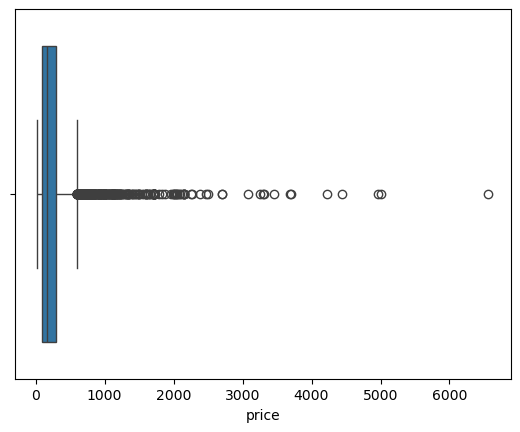

In [44]:
sns.boxplot(x=df['price'])


## In this data, extremely high prices may be luxury listings, not errors. Very low prices may be shared rooms or data entry mistakes.

In [45]:
df['log_price'] = np.log1p(df['price'])

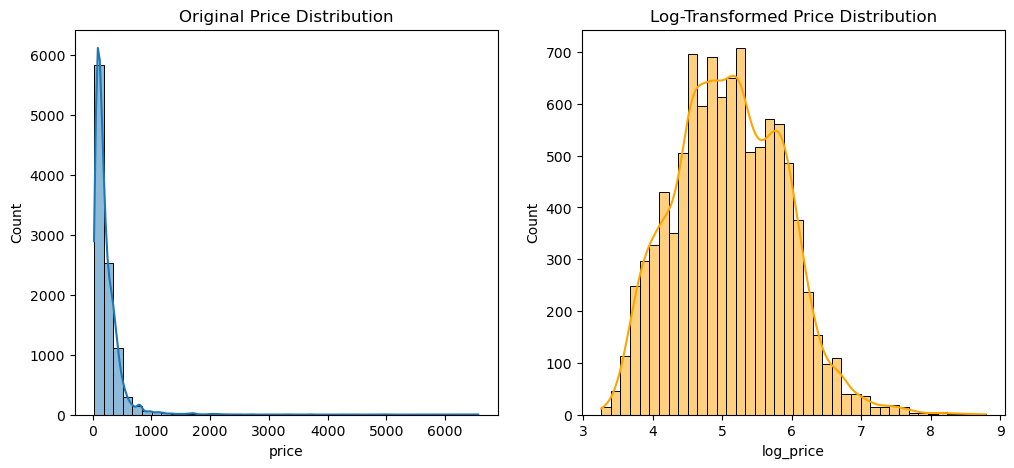

In [46]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=40, kde=True)
plt.title('Original Price Distribution')

plt.subplot(1,2,2)
sns.histplot(df['log_price'], bins=40, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.show()

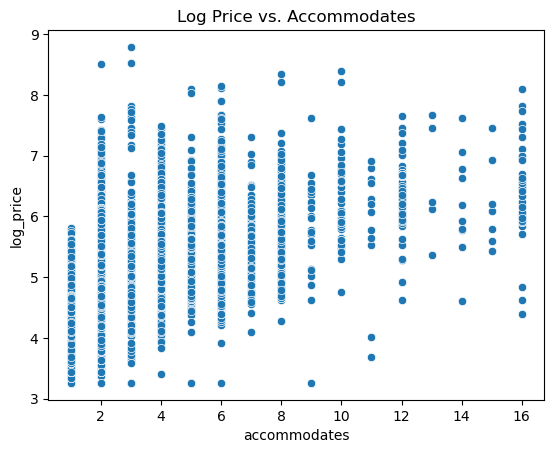

In [47]:
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Log Price vs. Accommodates')
plt.show()

## Price Determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to nightly price?

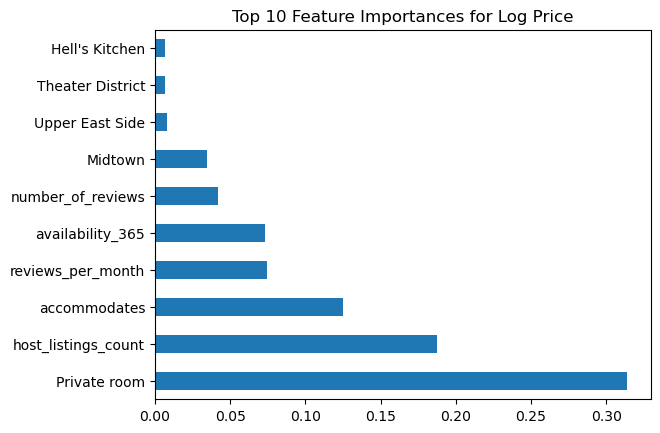

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

x = df[['accommodates', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'host_listings_count']]
x = pd.concat([x, pd.get_dummies(df['room_type']), pd.get_dummies(df['neighbourhood_cleansed'])], axis=1)

y = df['log_price']

rf = RandomForestRegressor(n_estimators=100, random_state=42)   
rf.fit(x, y)

importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Log Price')
plt.show()









## Host Activity: Do more experienced hosts (higher host_listings_count) charge differently or receive more reviews?

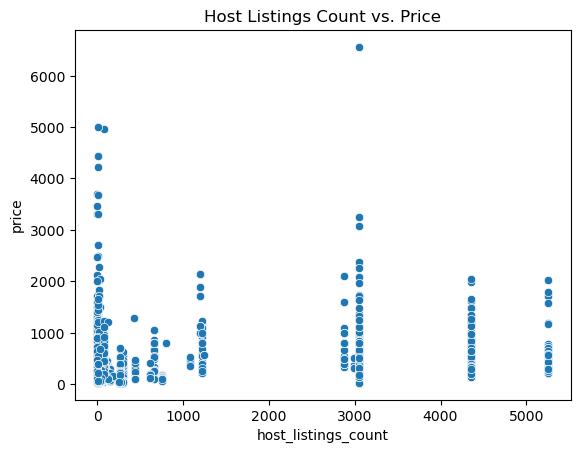

In [49]:
sns.scatterplot(x='host_listings_count', y='price', data=df)
plt.title('Host Listings Count vs. Price')
plt.show()






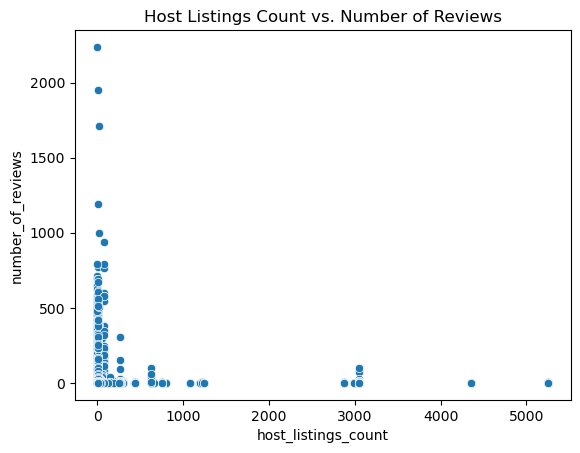

In [50]:
sns.scatterplot(x='host_listings_count', y='number_of_reviews', data=df)
plt.title('Host Listings Count vs. Number of Reviews')
plt.show()

In [51]:
print(df[['host_listings_count', 'log_price', 'number_of_reviews']].corr())

                     host_listings_count  log_price  number_of_reviews
host_listings_count             1.000000   0.485136          -0.239672
log_price                       0.485136   1.000000          -0.127679
number_of_reviews              -0.239672  -0.127679           1.000000


## Demand Seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

In [52]:

# Extract year and month
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month

<Figure size 1200x700 with 0 Axes>

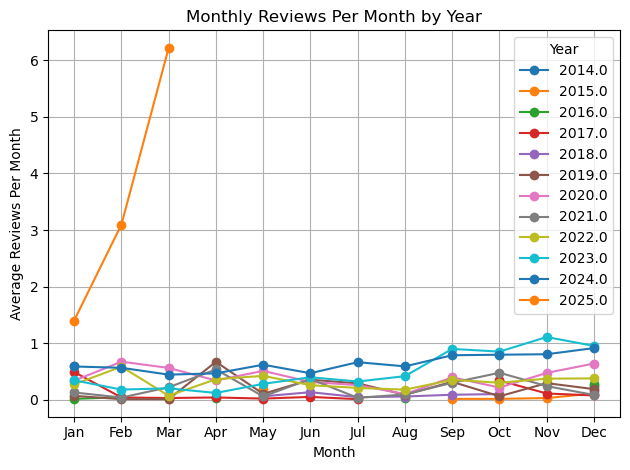

In [53]:
# Group by year and month
monthly_yearly = (
    df.groupby(['review_year', 'review_month'])['reviews_per_month']
    .mean()
    .unstack(level=0)
    .reindex(index=range(1,13))  # Ensure all months are present
)

plt.figure(figsize=(12,7))
monthly_yearly.plot(marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Reviews Per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x2000 with 0 Axes>

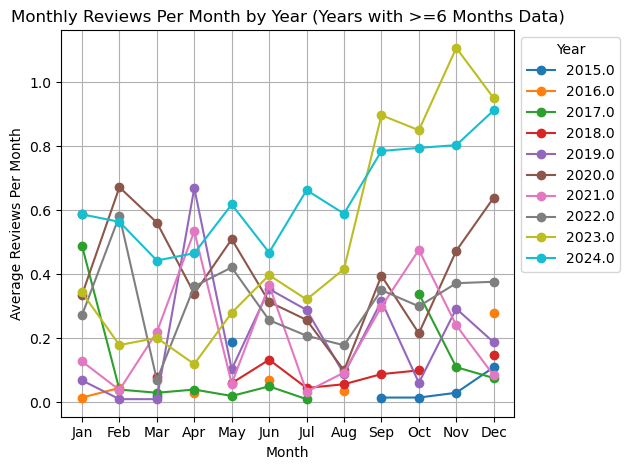

In [54]:
# Count months per year
months_per_year = df.groupby('review_year')['review_month'].nunique()
full_years = months_per_year[months_per_year >= 6].index

# Filter to those years
monthly_yearly_filtered = monthly_yearly[full_years]

plt.figure(figsize=(12,20))
monthly_yearly_filtered.plot(marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Reviews Per Month by Year (Years with >=6 Months Data)')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

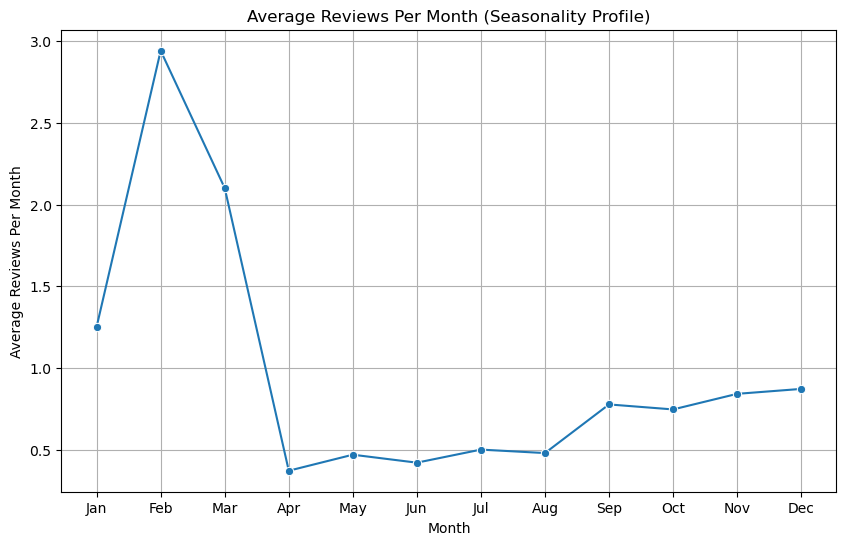

In [55]:

# Group by month (across all years)
monthly_avg = (
    df.groupby('review_month')['reviews_per_month']
    .mean()
    .reindex(range(1,13))  # Ensure all months are present
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Average Reviews Per Month (Seasonality Profile)')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.grid(True)
plt.show()

In [56]:
# Filter for March 2015
march_2015_df = df[
    (df['last_review'].dt.year == 2015) &
    (df['last_review'].dt.month == 3)
].copy()

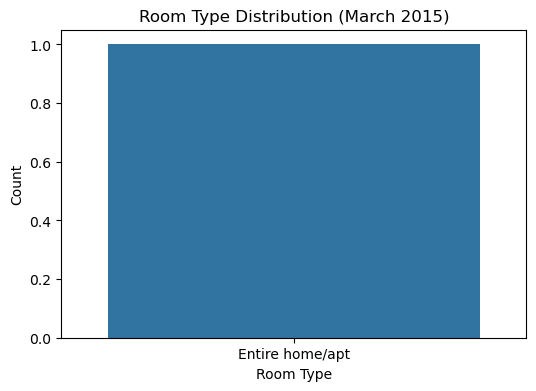

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x='room_type', data=march_2015_df)
plt.title('Room Type Distribution (March 2015)')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

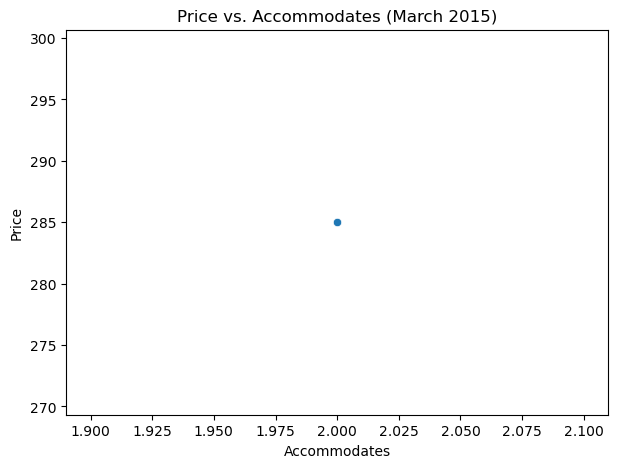

In [58]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='accommodates', y='price', data=march_2015_df)
plt.title('Price vs. Accommodates (March 2015)')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

In [59]:
number_of_rows_2015_march = march_2015_df.shape[0]
print(f"Number of rows with last_review in March 2015: {number_of_rows_2015_march}")

Number of rows with last_review in March 2015: 1


##  Review Impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?

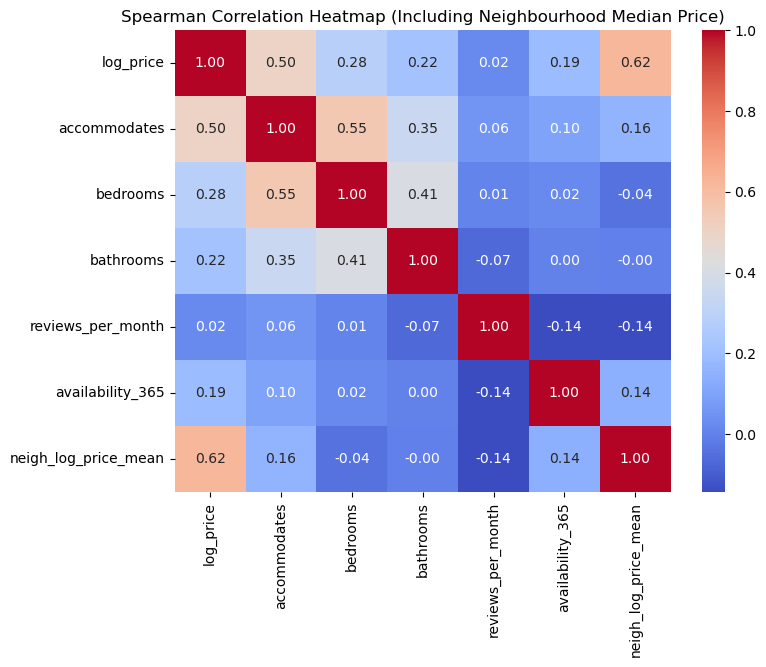

In [60]:
neigh_price = df.groupby('neighbourhood_cleansed')['log_price'].median()
df['neigh_log_price_mean'] = df['neighbourhood_cleansed'].map(neigh_price)

# 2. Select features for heatmap
selected = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'reviews_per_month', 'availability_365', 'neigh_log_price_mean']
small_corr = df[selected].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(small_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap (Including Neighbourhood Median Price)')
plt.show()

## Listing Characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

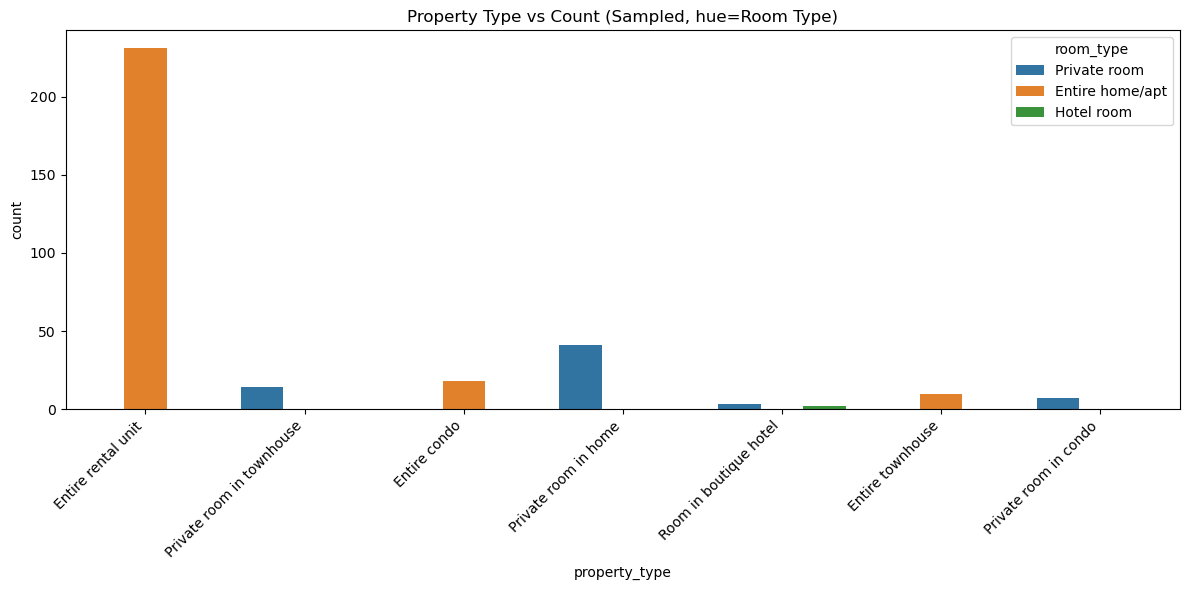

In [61]:
# Take a random sample (e.g., 500 rows)
sample_df = df.sample(n=500, random_state=42)

plt.figure(figsize=(12,6))
sns.countplot(data=sample_df, x='property_type', hue='room_type', order=sample_df['property_type'][:8].value_counts().index)
plt.title('Property Type vs Count (Sampled, hue=Room Type)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features (including location)
features = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews', 'latitude', 'longitude']
X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
df_pca = df.loc[X.index].copy()
df_pca['PC1'] = pcs[:, 0]
df_pca['PC2'] = pcs[:, 1]

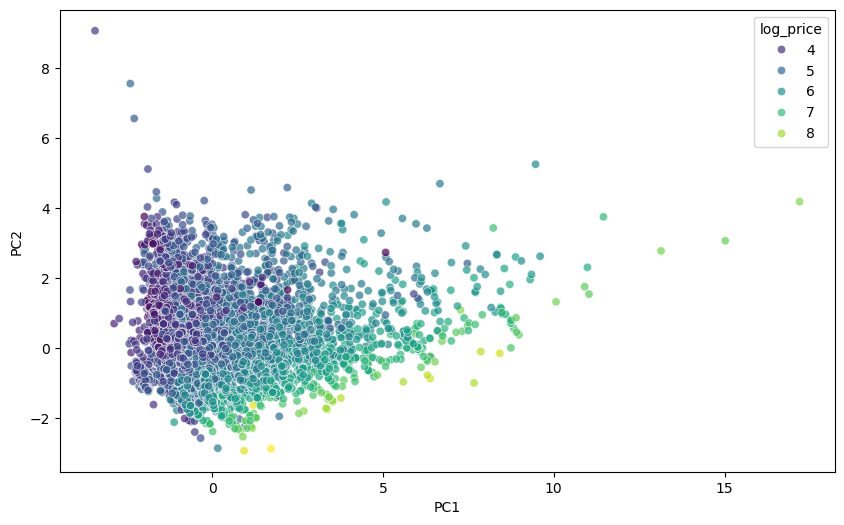

In [63]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='log_price', data=df_pca, palette='viridis', alpha=0.7)
plt.show()

In [64]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_pca,
    lat="latitude",
    lon="longitude",
    color="log_price",  # or 'cluster' if you have it
    size_max=8,
    zoom=11,
    mapbox_style="carto-positron",
    hover_data=["log_price", "accommodates", "bedrooms"]
)
fig.update_layout(title="Airbnb Listings by Location and Price")
fig.show()

/tmp/ipykernel_7078/922206071.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [65]:
import folium

# Center the map on the mean latitude and longitude of your listings
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add each listing as a circle marker
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Price: {row['price']}"  # You can customize this popup
    ).add_to(m)

# Save the map to an HTML file
m.save('airbnb_map.html')

In [66]:
df['description'].iloc[3]

'This charming distancing-friendly month-to-month home away from home located in Historic Harlem, Uptown Sanctuary is ideal for lovers of travel, work-life balance, art, soulful living,  culture, and kindness.<br /><br />Spacious bedroom available (if you require more space, please inquiry about the master bedroom with its own ensuite bathroom or renting the whole place).<br /><br />➨ Minimum 30-day stay only, thank you for understanding!<br />➨ Additional fees apply for events and must be approved in advance.'

In [67]:
keywords = [
    'wifi', 'parking', 'kitchen', 'balcony', 'pool', 'air conditioning', 'heating',
    'washer', 'dryer', 'pet friendly', 'family', 'downtown', 'quiet', 'spacious',
    'modern', 'cozy', 'view', 'garden', 'breakfast', 'transport', 'public transport',
    'shopping', 'restaurants', 'beach', 'mountain', 'good service', 'clean', 'safe', 'Luxury', 'space', 'private', 'discount', 'free'
]

In [68]:
def extract_keywords_from_description(text, keywords):
    text = text.lower()
    found = [kw for kw in keywords if kw in text]

    return ', '.join(found) if found else 'NO keywords'
    

In [69]:
df['description_summary'] = df['description'].apply(lambda x: extract_keywords_from_description(x, keywords))


In [ ]:
grouped=df.groupby('neighbourhood')